# Load data

In [1]:
import json
from pathlib import Path
import PIL

import h5py
import matplotlib.pyplot as plt
import numpy as np
import torch

h5_path = './datasets/vg/train.h5'
image_dir = './datasets/vg/images/'

with open('./datasets/vg/vocab.json', 'r') as fj:
    vocab = json.load(fj)


data = {}
with h5py.File(h5_path, 'r') as f:
    for k, v in f.items():
        if k == 'image_paths':
            image_paths = list(v)
        else:
            data[k] = torch.IntTensor(np.asarray(v))

# Process

In [2]:
def show_image(image_path):
    with open(image_path, 'rb') as f:
        with PIL.Image.open(f) as img_file:
            image = img_file.convert('RGB')

    plt.imshow(image)

def print_rels(rels):
    for r_idx in range(rels):

        # get objs indices
        si = data['relationship_subjects'][index, r_idx]
        oi = data['relationship_objects'][index, r_idx]

        # get the objs labels
        s = data['object_names'][index, si]
        p = data['relationship_predicates'][index, r_idx]
        o = data['object_names'][index, oi]

        # convert numerical labels to names
        s_n = vocab['object_idx_to_name'][s]
        p_n = vocab['pred_idx_to_name'][p]
        o_n = vocab['object_idx_to_name'][o]

        # print(f'{s} - {p} - {o}')
        print(f'{s_n} - {p_n} - {o_n}')

Id: 1
sign - on - building
sidewalk - next to - street
car - has - back
car - parked on - street
tree - next to - street
tree - by - sidewalk
building - with - window


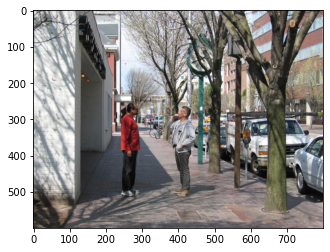

In [4]:
index = 0
img_id = data['image_ids'][index]
img_path = Path(image_dir, image_paths[index].decode("utf-8"))
print(f'Id: {img_id}')


rels = data['relationships_per_image'][index]
print_rels(rels)

show_image(img_path)